In [44]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import missingno as mno

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
# Loading the dataframe using Pandas
df = pd.read_csv("adult.csv")

In [46]:
# Checking first 5 records of the DataFrame
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
# Checking the basic info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [48]:
# Checking for the Null-Values.
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [49]:
# Checking the Basic Description of the DataFrame
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [50]:
# In the dataFrame null-values are represented with a "?" mark so we can convert them into numpy.nan values.
df.replace("?",np.nan,inplace=True)

In [51]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [52]:
# Let's Separate the Columns with Null-values.
null_cols = [column for column in df.columns if df[column].isnull().sum() > 0]

In [53]:
# checking the columns
null_cols

['workclass', 'occupation', 'native-country']

In [54]:
# Observing the columns with null values
df[null_cols]

,workclass,occupation,native-country
0,Private,Machine-op-inspct,United-States
1,Private,Farming-fishing,United-States
2,Local-gov,Protective-serv,United-States
3,Private,Machine-op-inspct,United-States
4,NaN,NaN,United-States
...,...,...,...
48837,Private,Tech-support,United-States
48838,Private,Machine-op-inspct,United-States
48839,Private,Adm-clerical,United-States
48840,Private,Adm-clerical,United-States


In [55]:
# Checking for the Datatypes of the null-columns
df[null_cols].dtypes

workclass         object
occupation        object
native-country    object
dtype: object

In [56]:
# Checking for the number of unique values in this columns
df[null_cols].nunique()

workclass          8
occupation        14
native-country    41
dtype: int64

In [57]:
# Adding someweightage to the columns where they had null_values
imputed_columns = []
for column in null_cols:
    df[column+"_null_weight"] = df[column]
    imputed_columns.append(column+"_null_weight")
    df[column+"_null_weight"] = np.where(df[column].isnull(),1,0)

In [58]:
# Let's check whether the new columns are created or not.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_null_weight,occupation_null_weight,native-country_null_weight
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,1,1,0


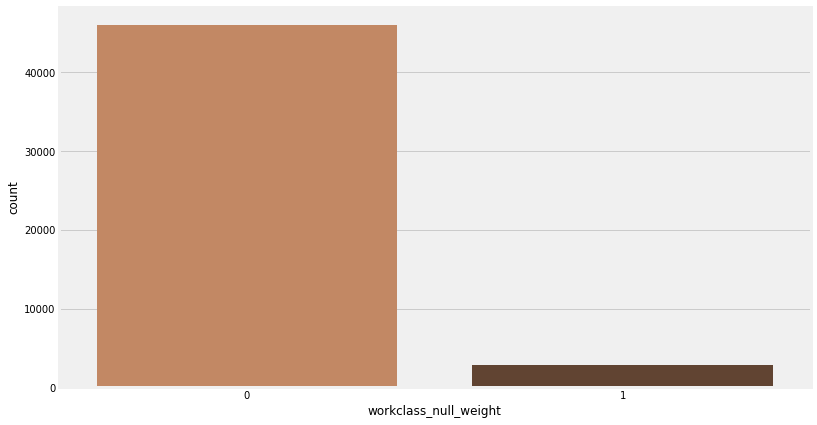

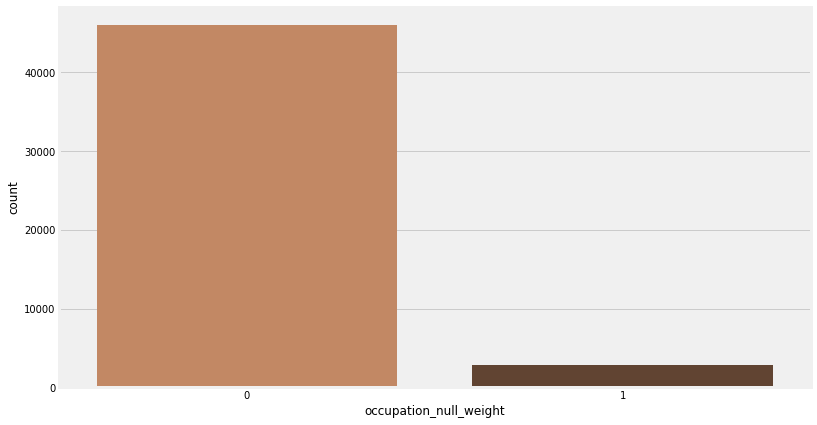

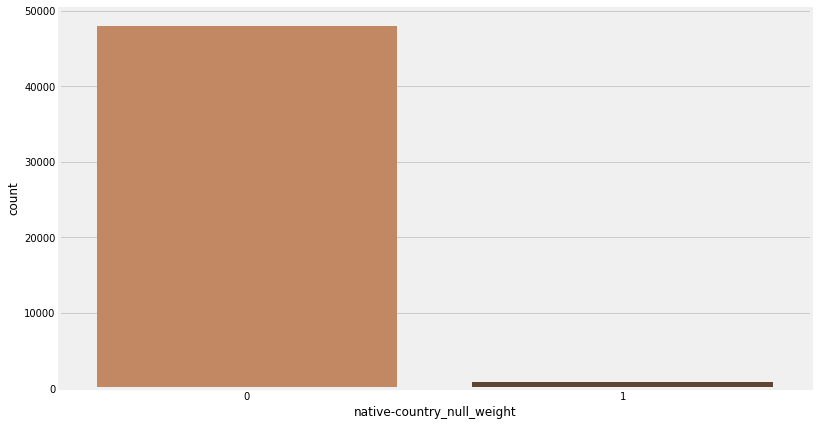

In [59]:
for column in imputed_columns:
    plt.figure(figsize=(12,7))
    sns.countplot(df[column],palette="copper_r")
    plt.show()

#### All the Columns are Categorical Columns and all are having Discrete Values , So we can fill them with mode.

In [60]:
# Filling the Null-columns with mode
for column in null_cols:
    work_mode = df[column].mode()[0]
    df[column].fillna(work_mode,inplace=True)

In [61]:
df[null_cols].isnull().sum()

workclass         0
occupation        0
native-country    0
dtype: int64

In [62]:
df.isnull().sum()

age                           0
workclass                     0
fnlwgt                        0
education                     0
educational-num               0
marital-status                0
occupation                    0
relationship                  0
race                          0
gender                        0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
income                        0
workclass_null_weight         0
occupation_null_weight        0
native-country_null_weight    0
dtype: int64

#### Now we have successfully imputed the Missing values with most_frequent value as well as created a new column for giving Weightage for the missing value.

In [63]:
# Checking for the Dataframe to understand the columns
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_null_weight,occupation_null_weight,native-country_null_weight
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,0
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,1,1,0


In [64]:
# First encode the target column with labels .
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [65]:
df['income'].dtype

dtype('O')

In [66]:
# We can simply map them with numerical label (0,1).
# More than 50k = 1, less than or equal to 50k = 0.
df["income"] = df['income'].map({"<=50K":0,">50K":1})

In [67]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

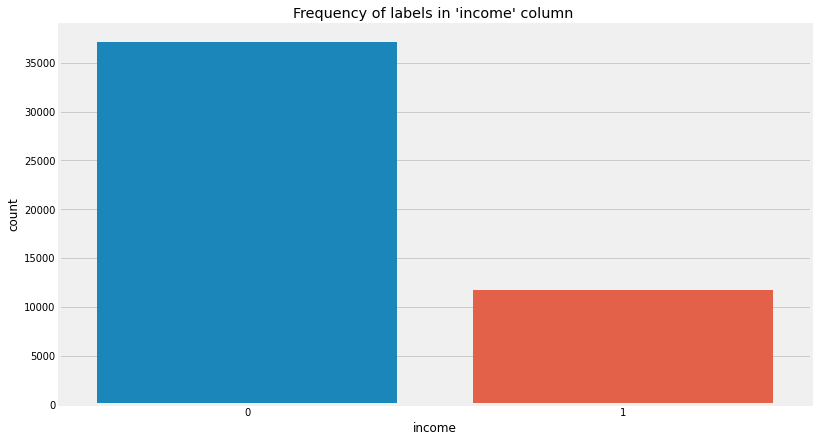

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(df['income'])
plt.title("Frequency of labels in 'income' column ")
plt.show()

In [69]:
# Let's separate all the numerical columns from the dataset. 
num_cols = [column for column in df.columns if column not in df.select_dtypes(include="O")]

In [70]:
# Checking the data types for the confirmation
df[num_cols].dtypes

age                           int64
fnlwgt                        int64
educational-num               int64
capital-gain                  int64
capital-loss                  int64
hours-per-week                int64
income                        int64
workclass_null_weight         int32
occupation_null_weight        int32
native-country_null_weight    int32
dtype: object

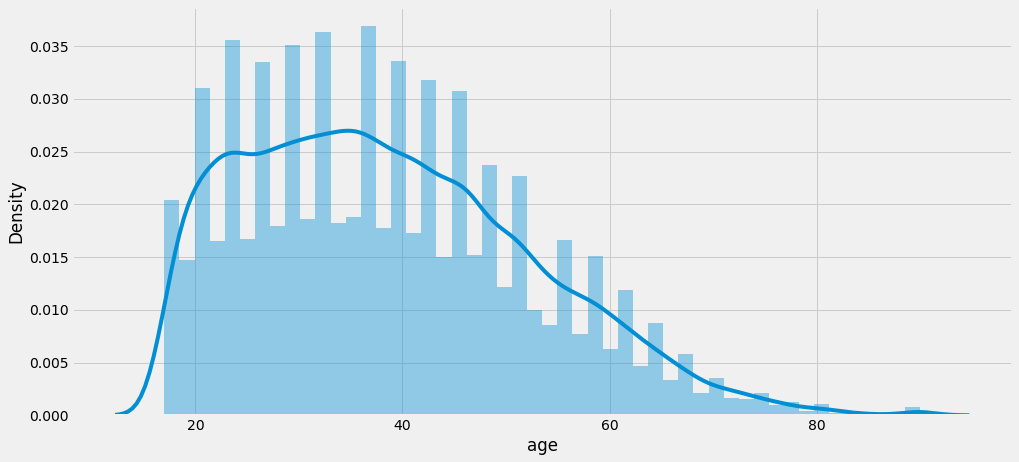

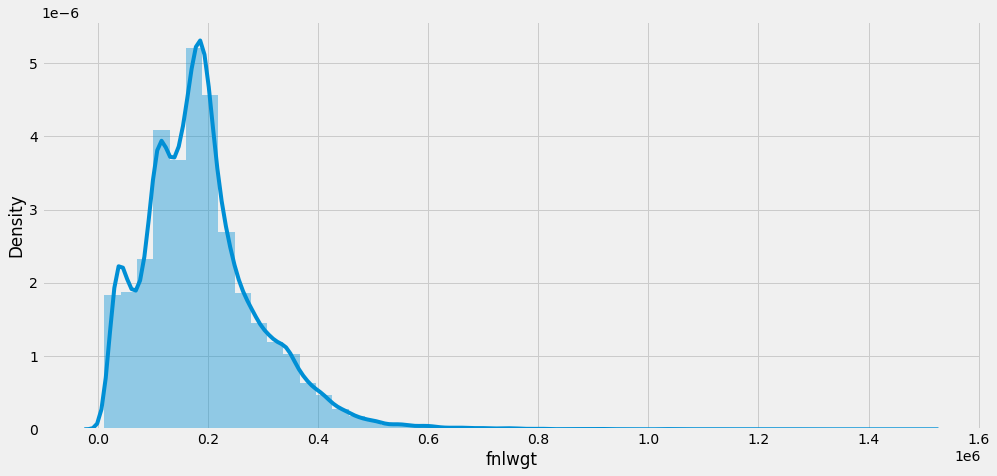

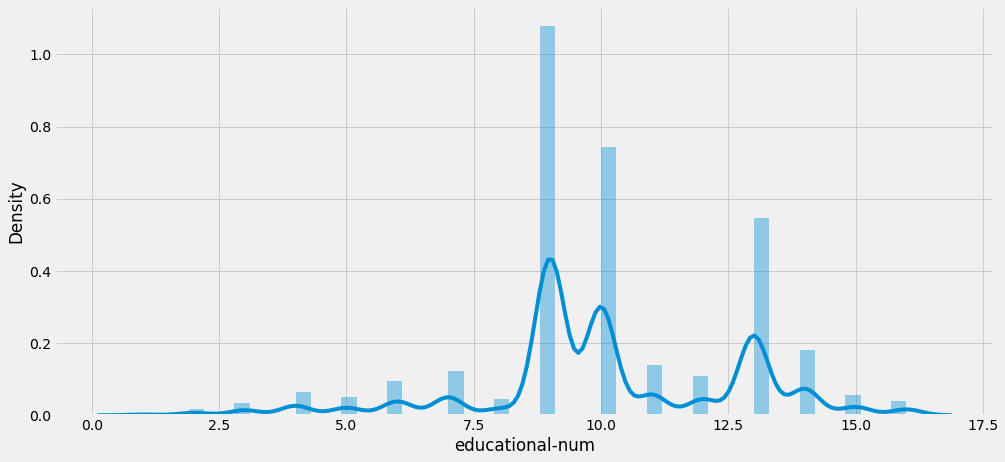

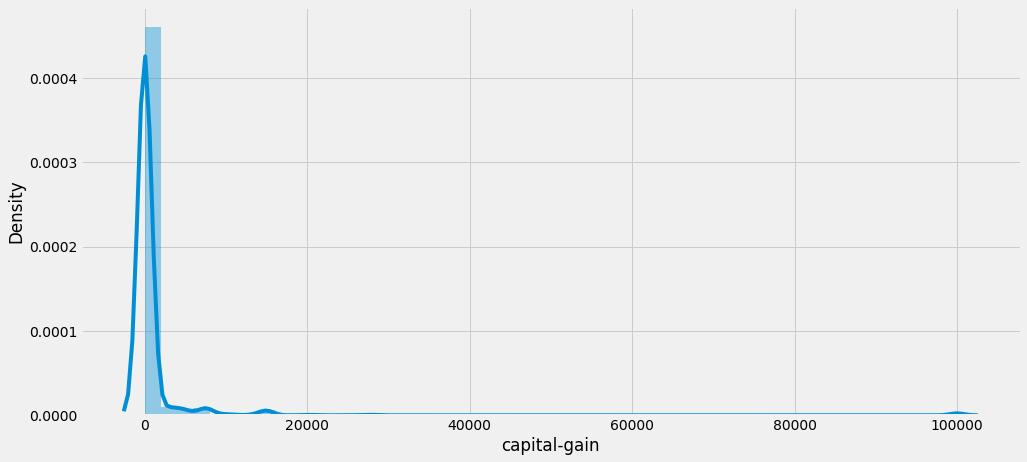

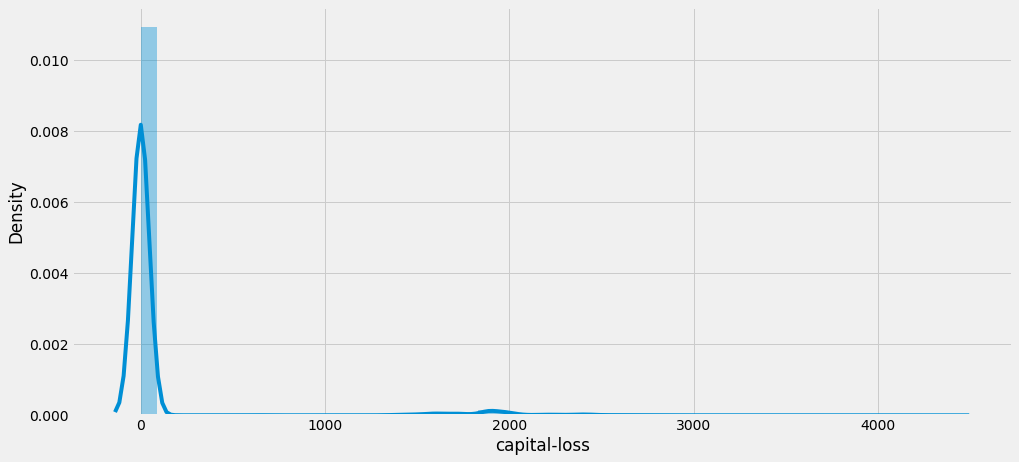

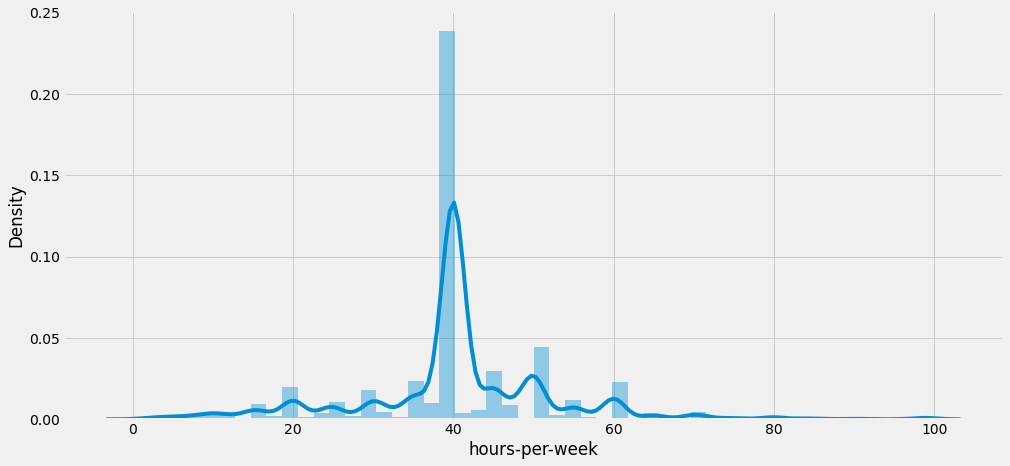

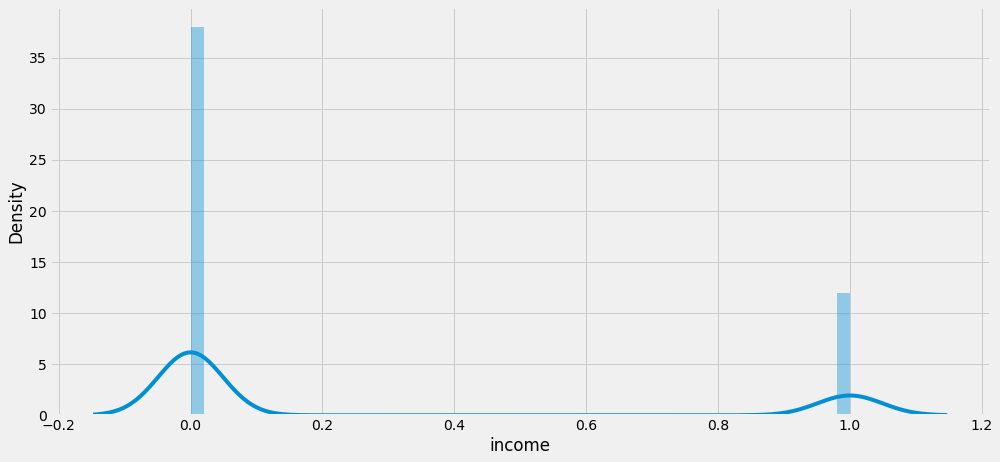

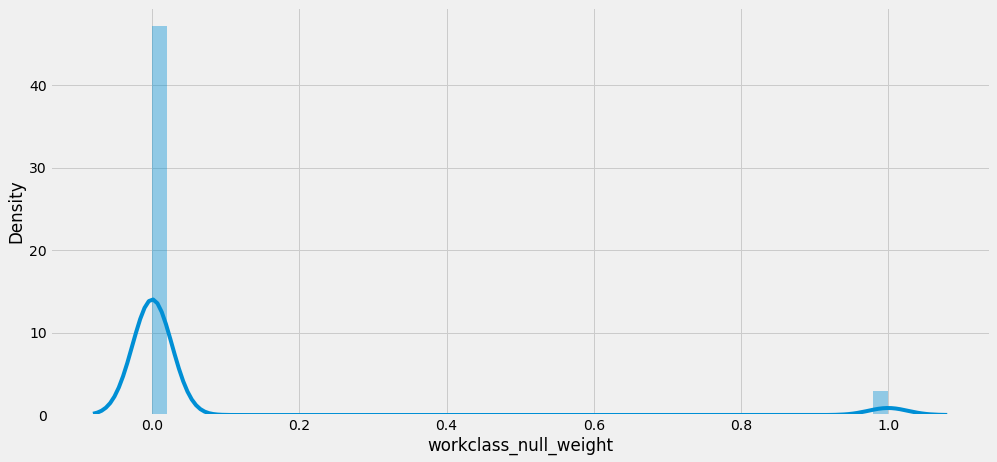

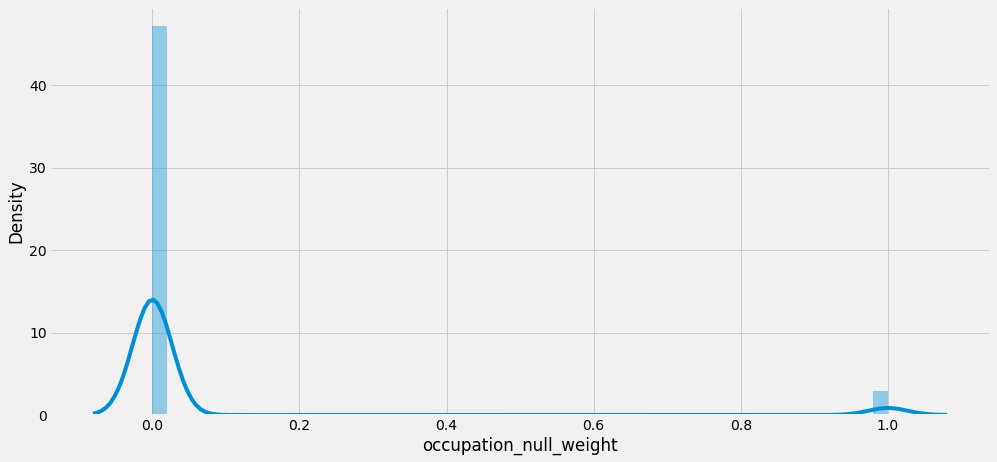

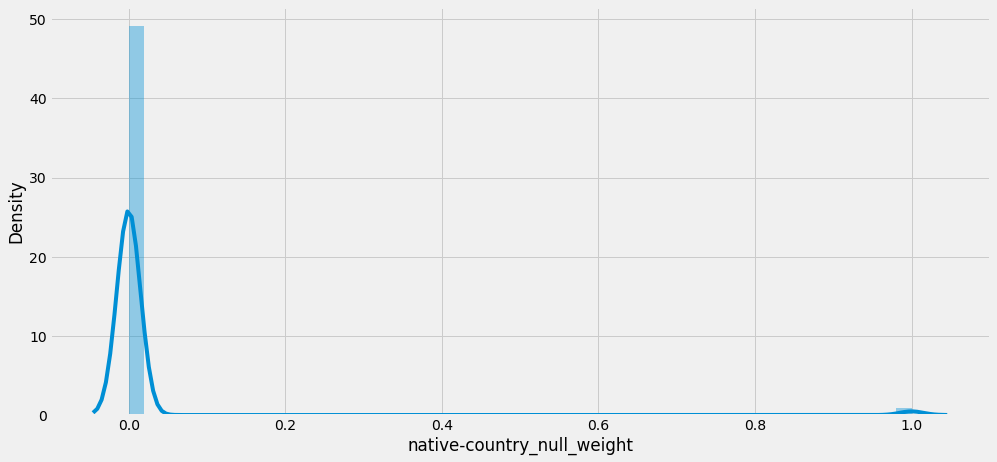

In [71]:
plt.style.use("fivethirtyeight")
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.show()

In [72]:
marker = dict(markerfacecolor='yellow',markeredgecolor='red',markersize=15,marker='o')

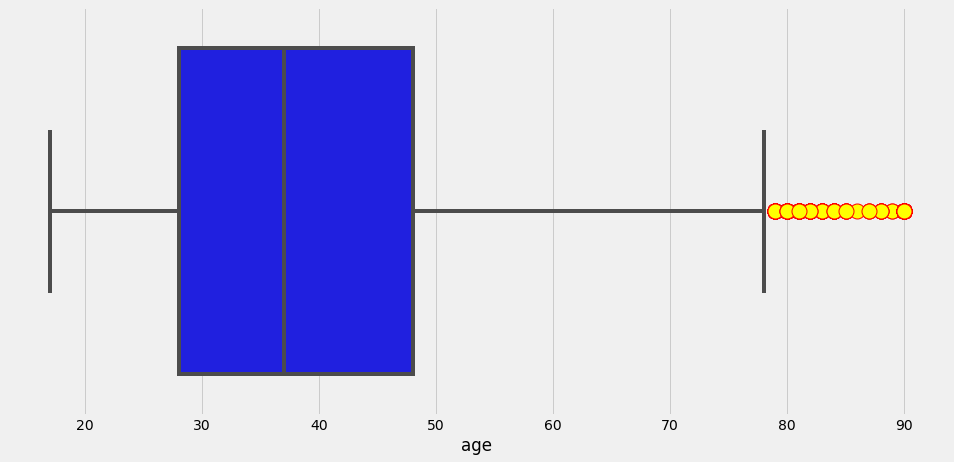

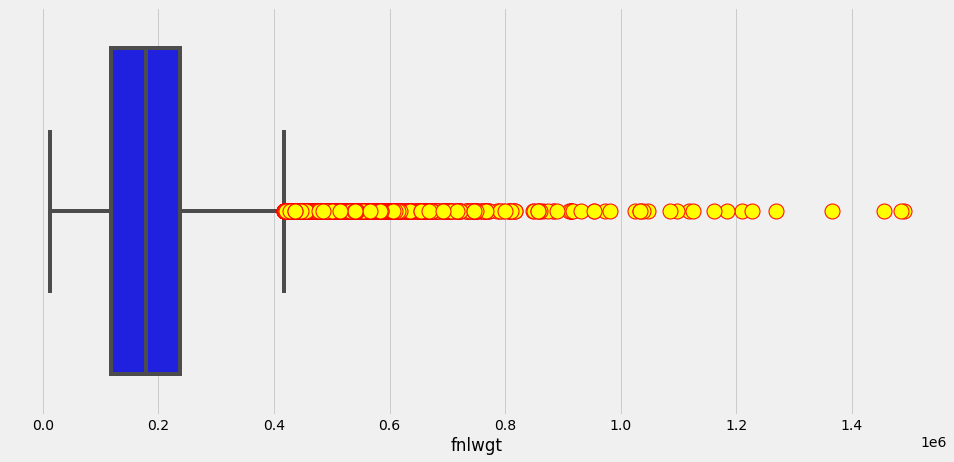

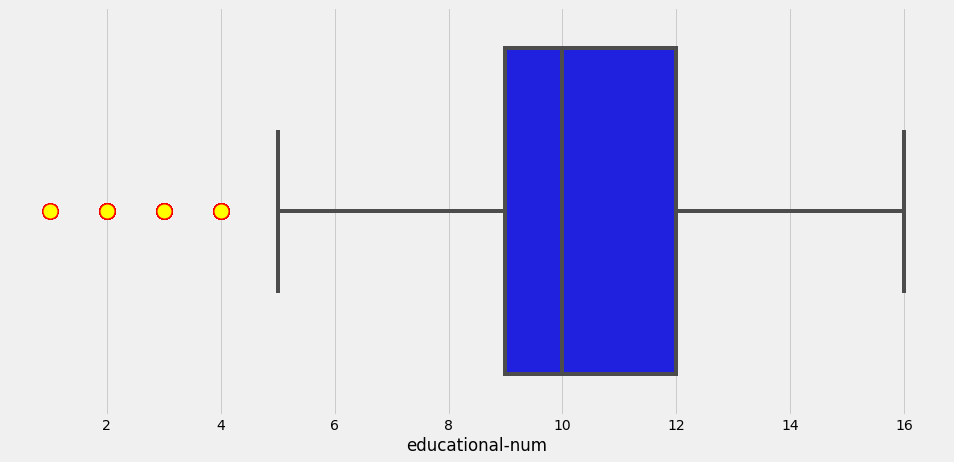

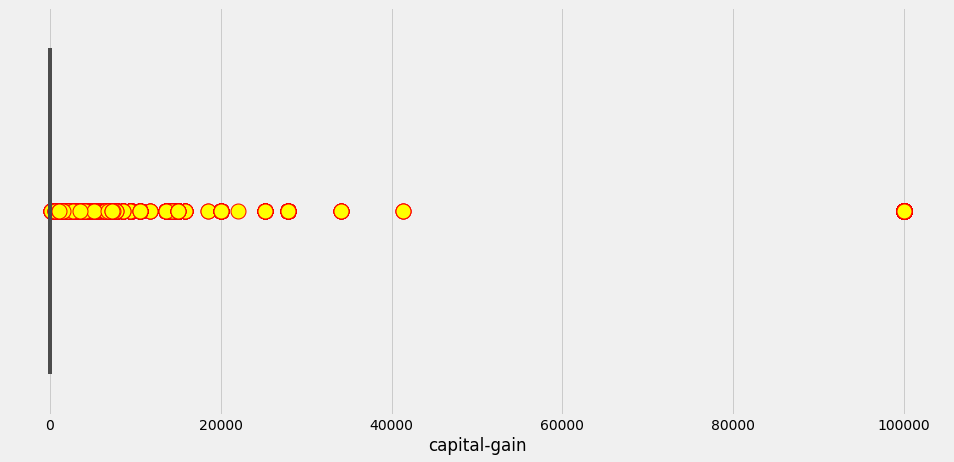

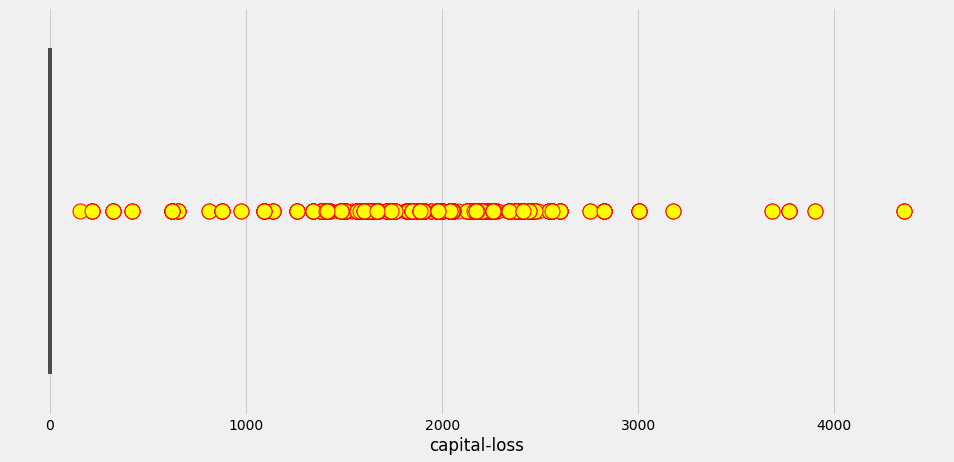

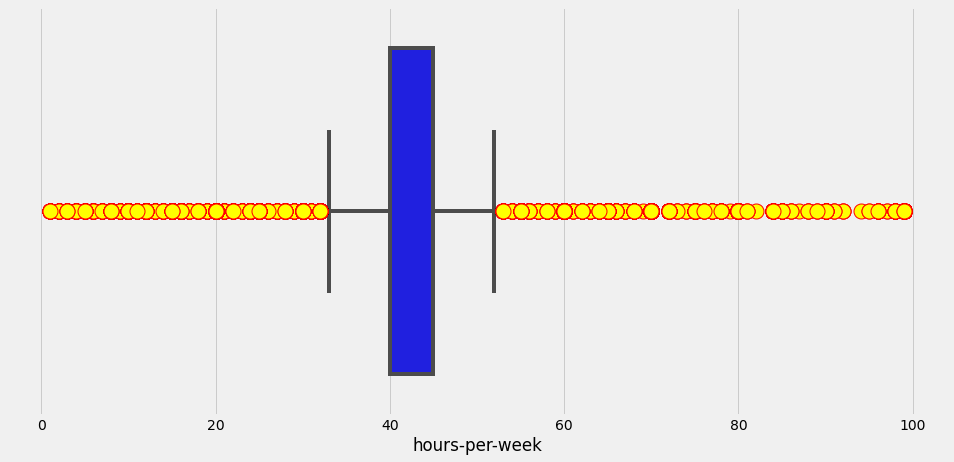

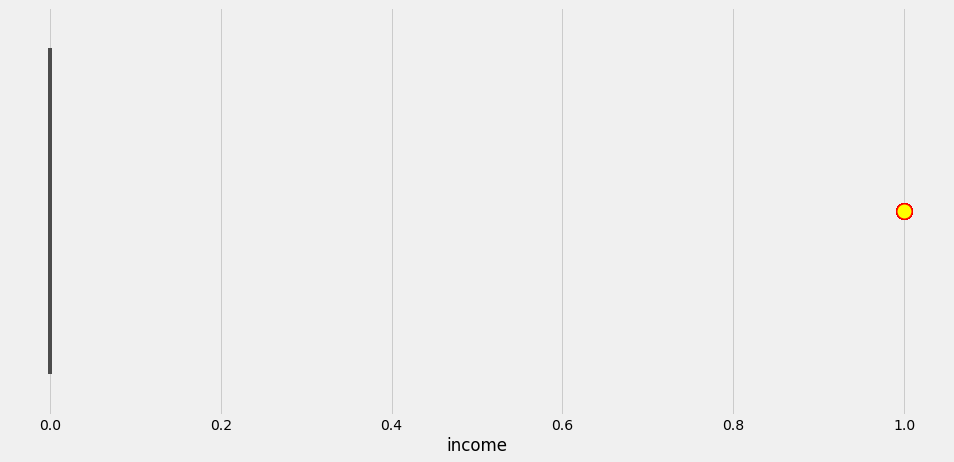

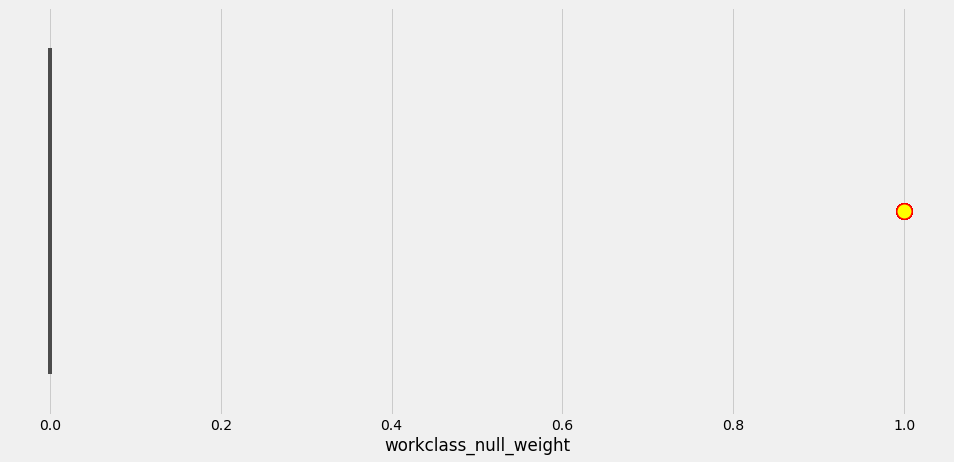

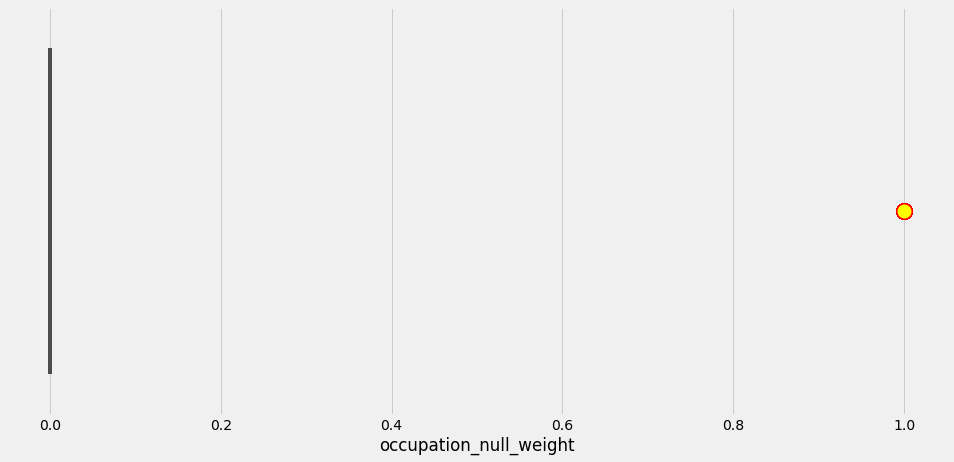

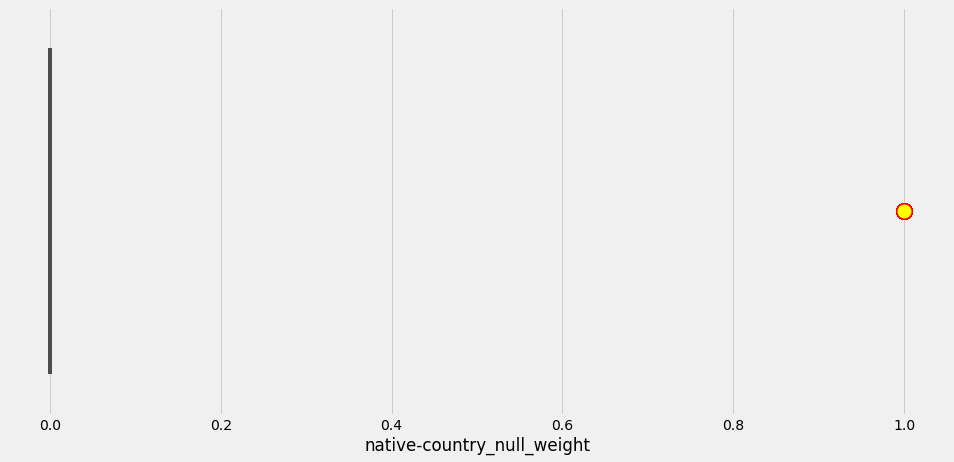

In [73]:
plt.style.use("fivethirtyeight")
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(df[col],color='blue',flierprops = marker)
    plt.show()

In [74]:
# Finding the Discrete columns from the numerical Columns
num_discrete_cols = [col for col in num_cols if df[col].nunique() < 25]

In [75]:
num_discrete_cols

['educational-num',
 'income',
 'workclass_null_weight',
 'occupation_null_weight',
 'native-country_null_weight']

In [76]:
num_cols = [col for col in num_cols if col not in num_discrete_cols]

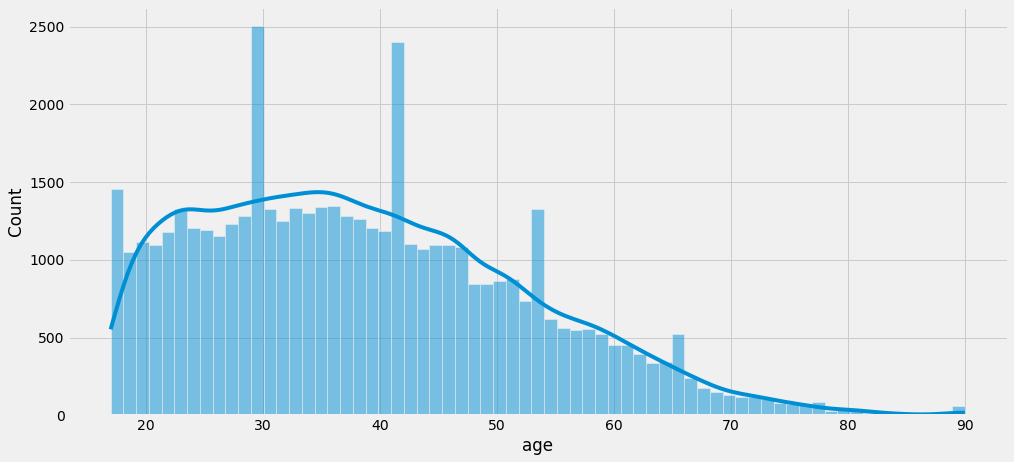

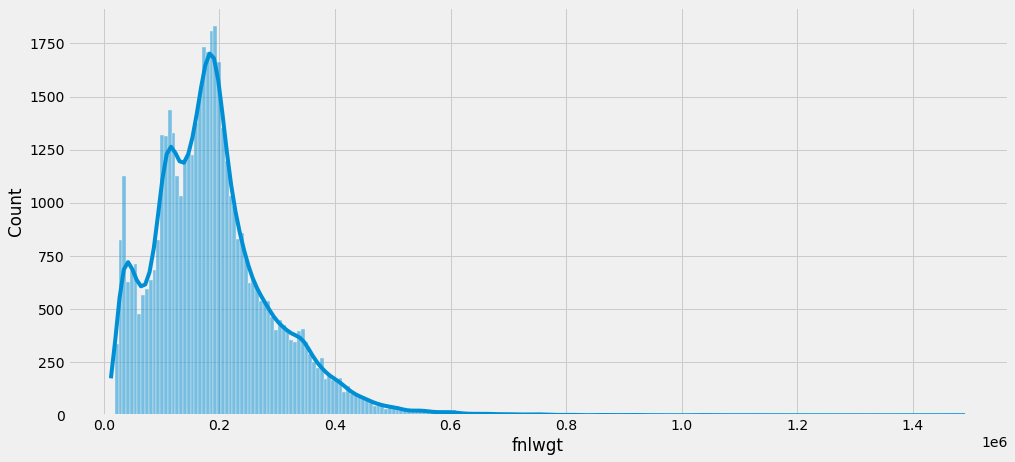

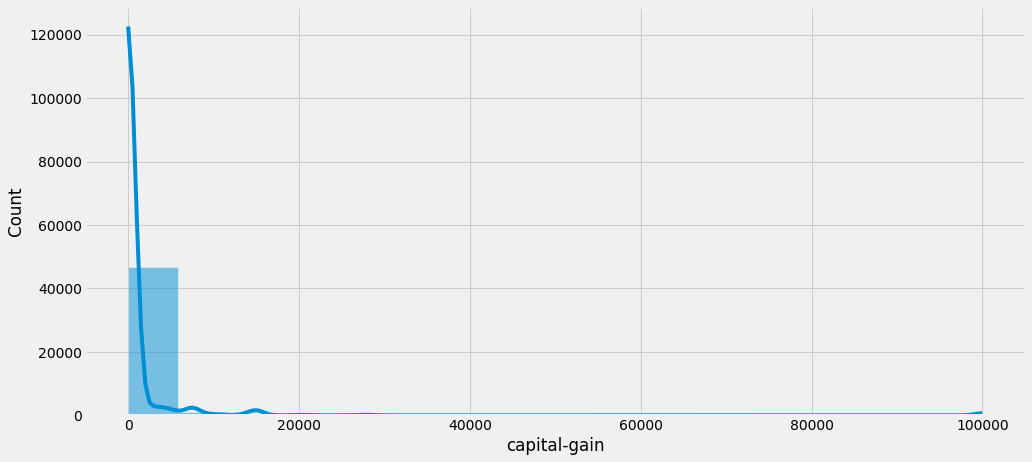

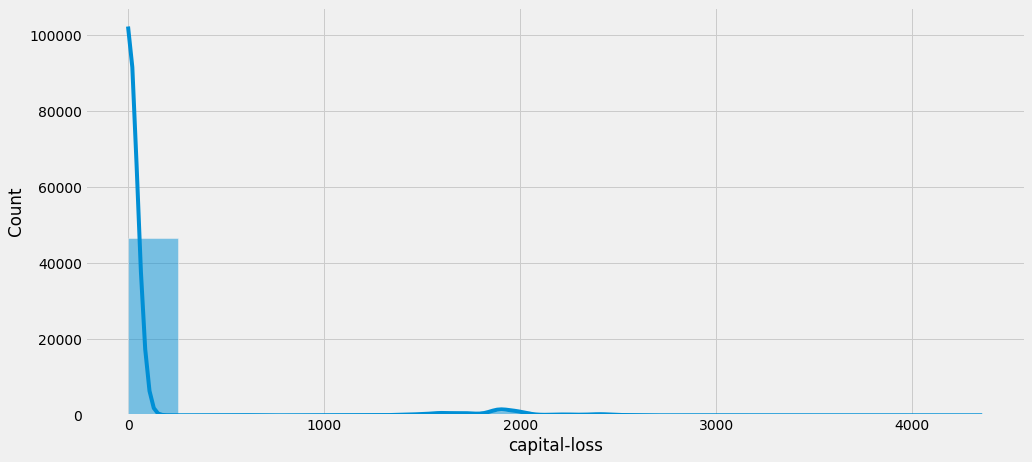

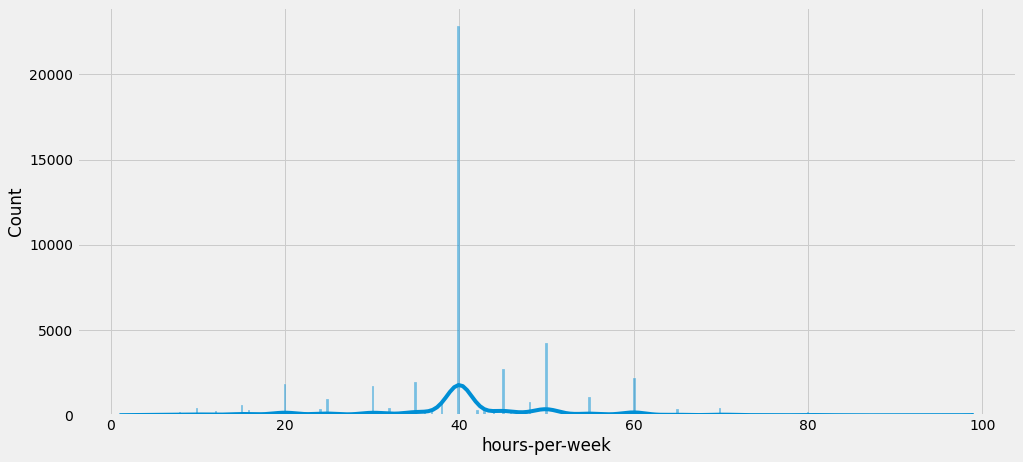

In [77]:
# Plotting Histograms for num_cols 
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.histplot(df[col],kde=True)
    plt.show()

In [78]:
# Separating the categorical columns
cat_cols = [column for column in df.columns if column not in  num_discrete_cols]
cat_cols = [column for column in cat_cols if column not in  num_cols]

In [79]:
# Checking the Datatype for confirmation
df[cat_cols].dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
dtype: object

In [80]:
df[num_discrete_cols].nunique()

educational-num               16
income                         2
workclass_null_weight          2
occupation_null_weight         2
native-country_null_weight     2
dtype: int64

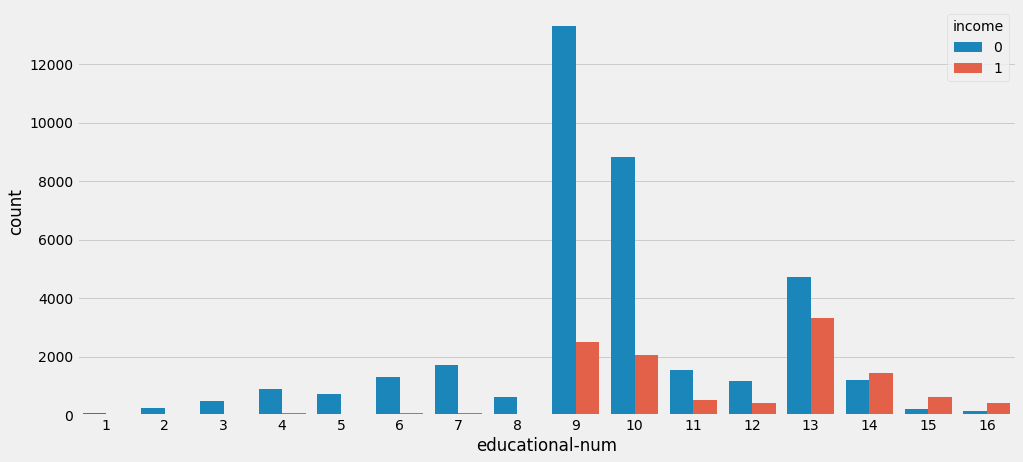

In [81]:
# We are only looking at "educational-num" column , because remains columns are we created for the null-weightage
plt.figure(figsize=(15,7))
sns.countplot(df['educational-num'],hue=df['income'])
plt.show()

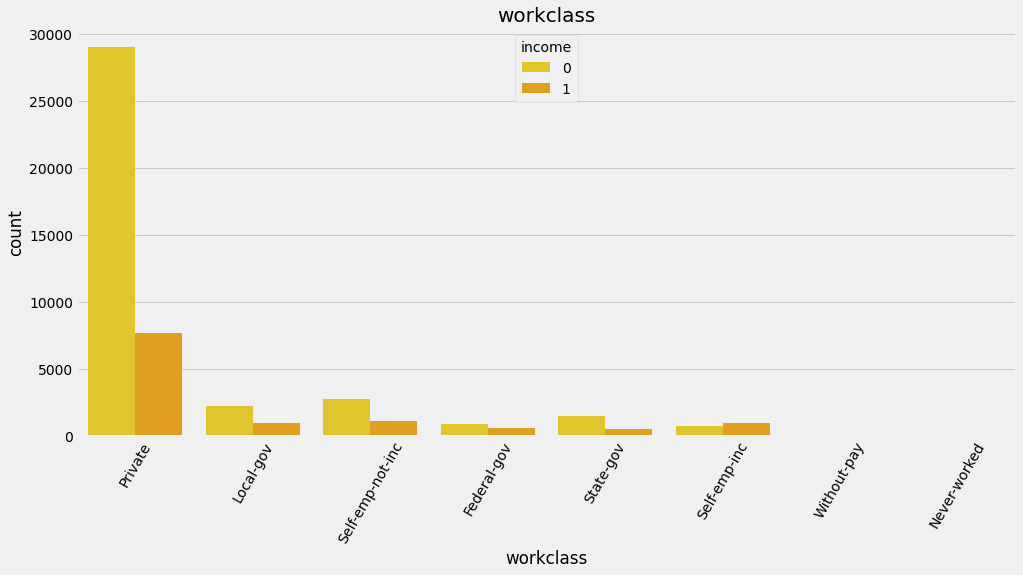

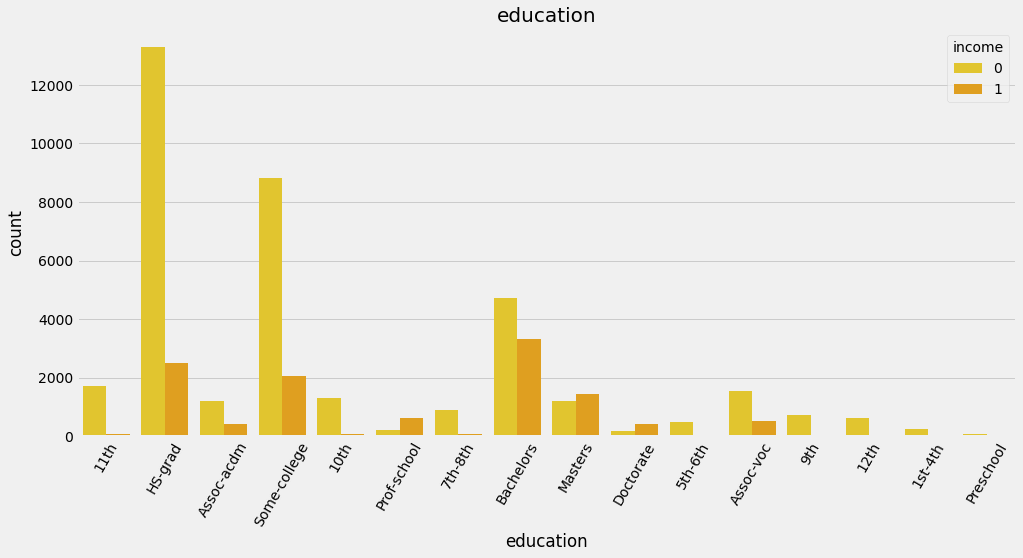

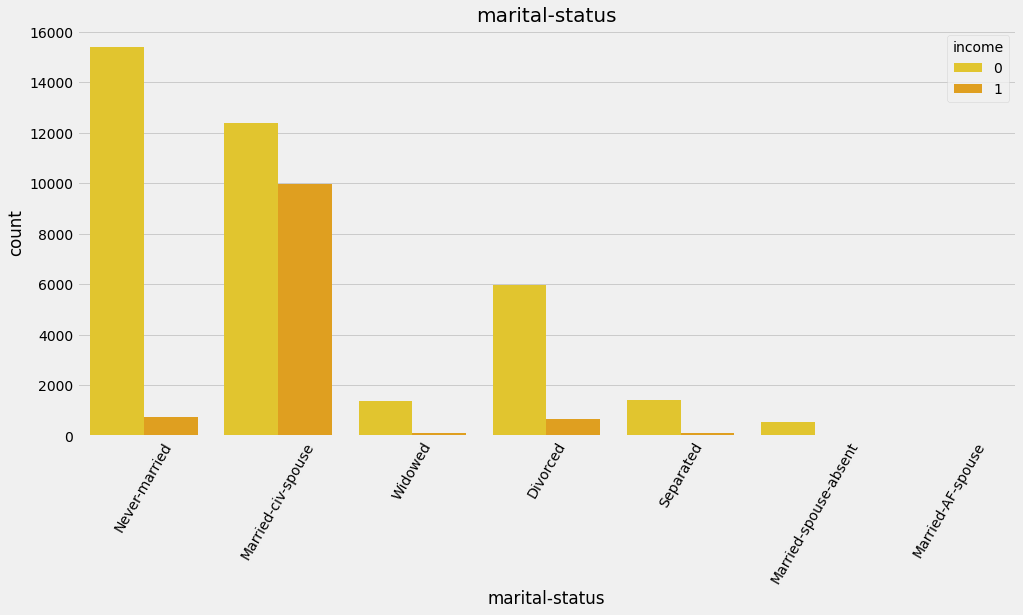

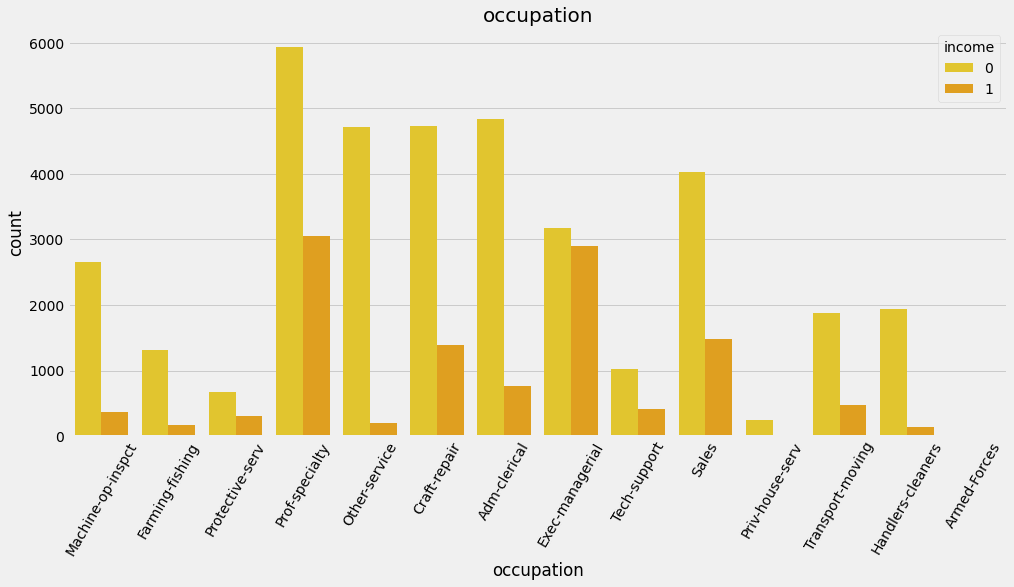

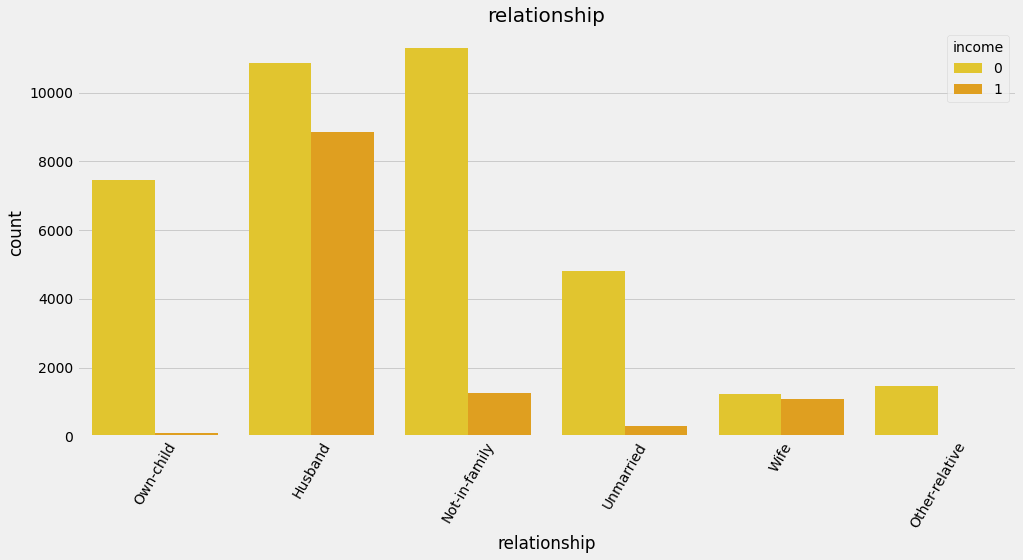

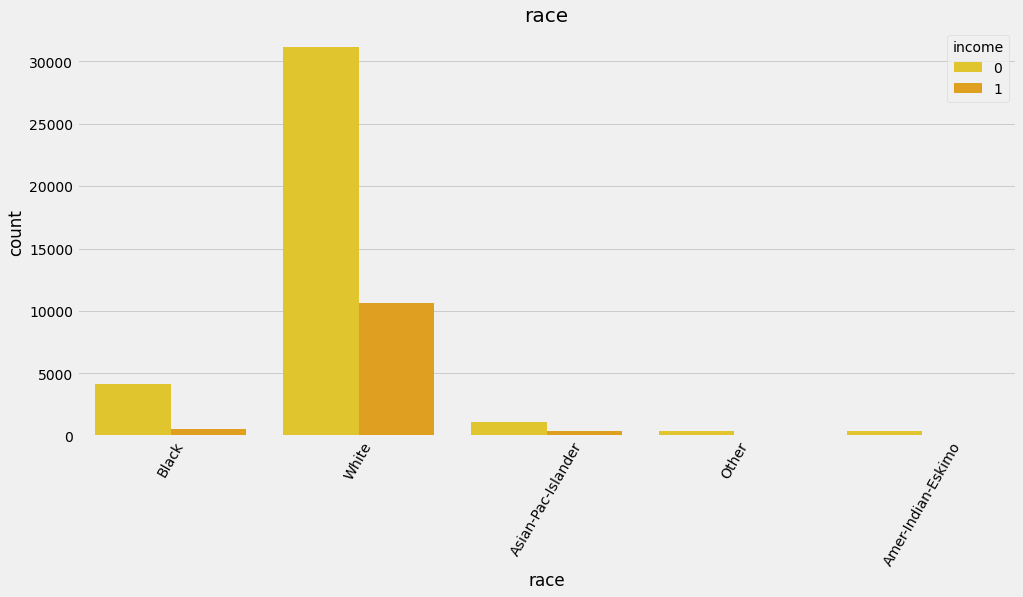

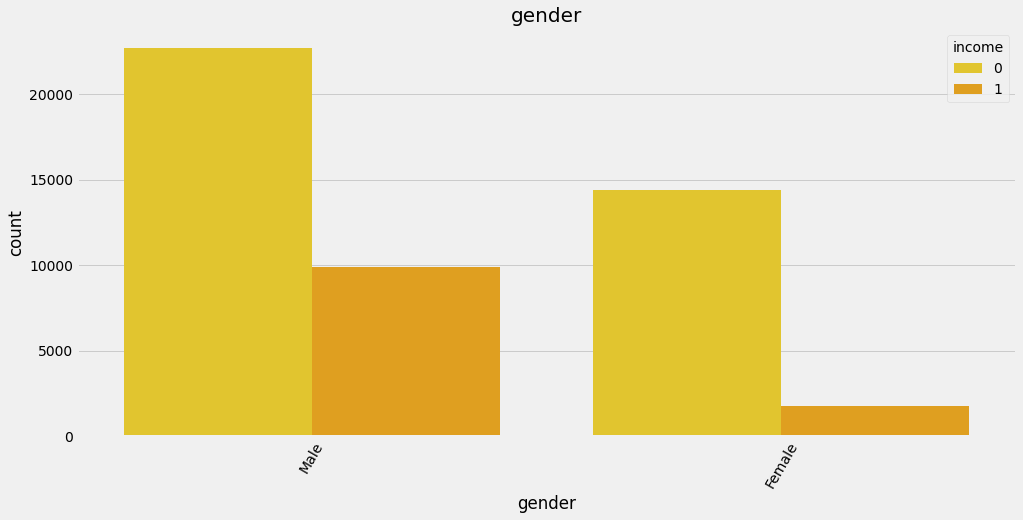

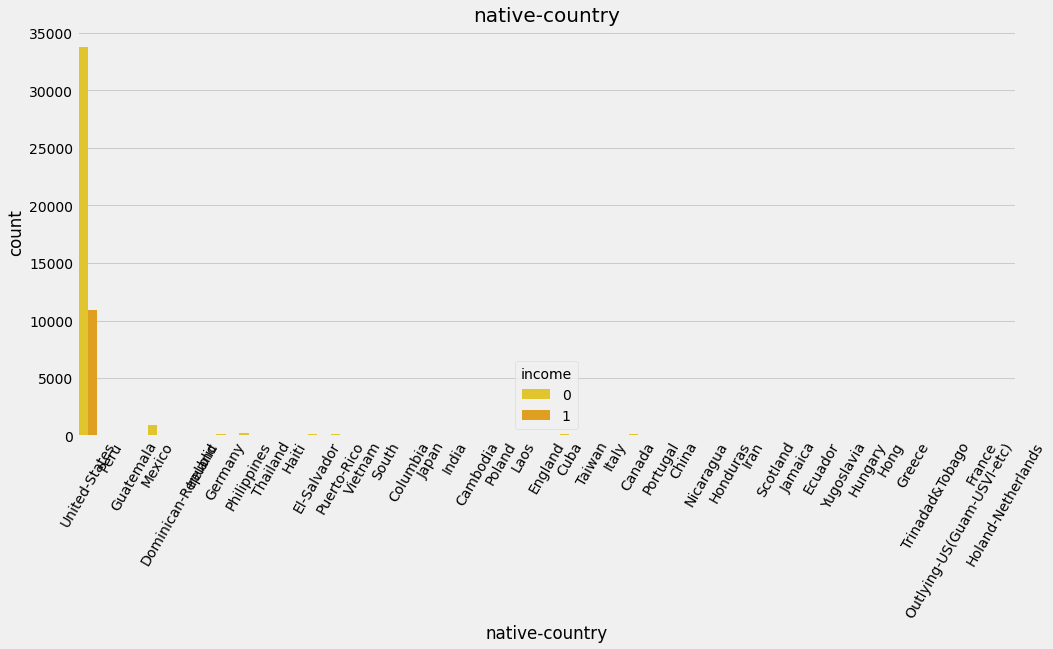

In [82]:
# Looking for the Relation with Categorical columns and Income
for column in cat_cols:
    plt.figure(figsize=(15,7))
    sns.countplot(df[column],hue=df['income'],palette="Wistia")
    plt.xticks(rotation = 60)
    plt.title(column,fontsize=20)
    plt.show()

In [83]:
df[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [41]:
# Encoding the Categorical Columns wrt to their effectness on the Target column
# Target Guided Encoding
category_dicts = []
for col in cat_cols:
    labels = df.groupby(col)['income'].mean().sort_values().index
    col_dict = {k:i for i , k in enumerate(labels,0)}
    df[col] = df[col].map(col_dict)

In [84]:
# Making a dummy dataframe to onehot encode all the Categorical Columns
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [85]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_null_weight,occupation_null_weight,native-country_null_weight,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_null_weight,occupation_null_weight,native-country_null_weight,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


### Removing Outliers for the Numerical columns

In [87]:
# Removing Catpital-Gain and Capital-Loss column
num_cols = [column for column in num_cols if column not in ['capital-loss','capital-gain']]

In [88]:
# There are N number of Outliers in the Numerical Continuous Columns

In [89]:
df.shape

(48842, 101)

In [90]:
def removing_outliers(df,columns):
    for col in columns:
        print(col)
        iqr = (np.percentile(df[col],75) - np.percentile(df[col],25))
        print(iqr)
        lower_boundary = (np.percentile(df[col],25) - (1.5 * iqr))
        print(lower_boundary)
        upper_boundary = (np.percentile(df[col],75) + (1.5 * iqr))
        print(upper_boundary)
        df = df[(df[col] <= upper_boundary) & (df[col] >= lower_boundary)]
    return df

In [91]:
data = df.copy()

In [92]:
new_data = removing_outliers(data,num_cols)

age
20.0
-2.0
78.0
fnlwgt
120205.0
-62701.5
418118.5
hours-per-week
5.0
32.5
52.5


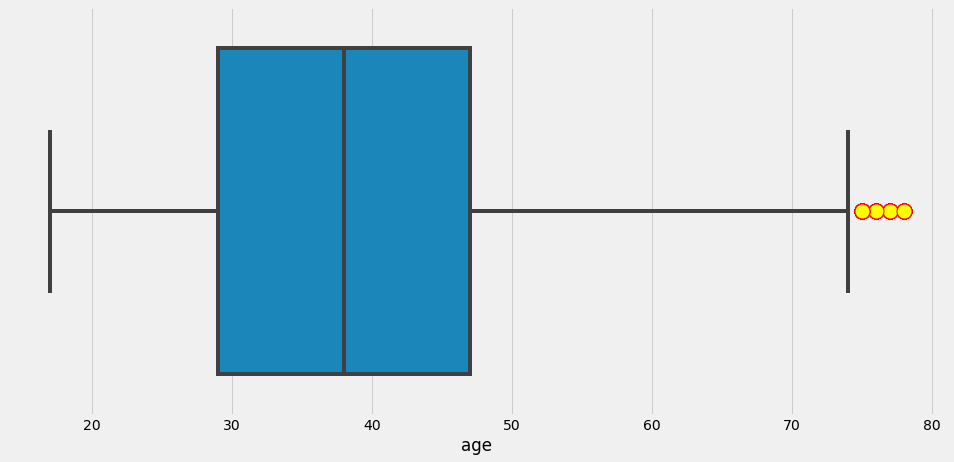

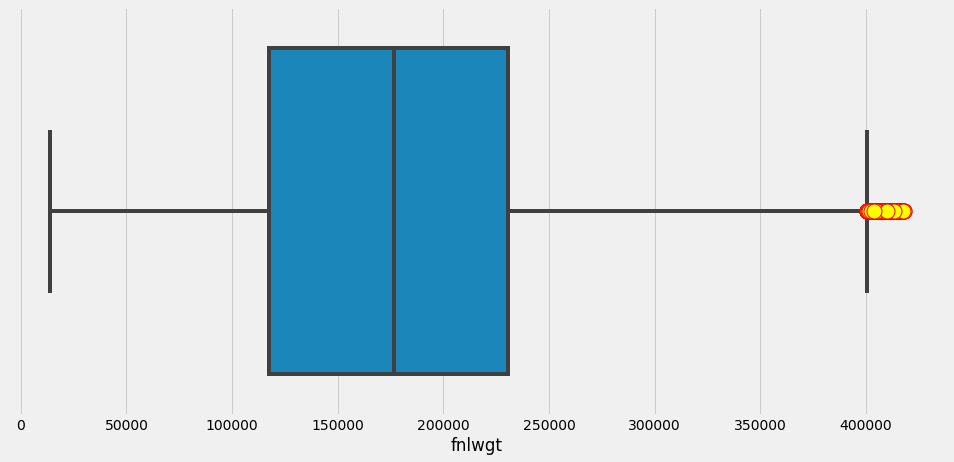

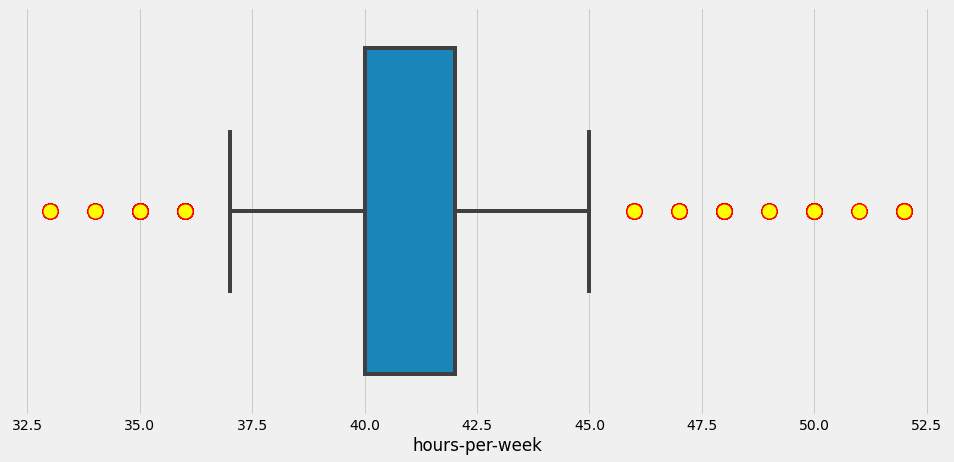

In [93]:
for column in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(new_data[column],flierprops = marker)
    plt.show()

In [94]:
df = new_data.copy()
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_null_weight,occupation_null_weight,native-country_null_weight,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,29,227026,9,0,0,40,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
# Check for the Dataset Balance
df['income'].value_counts()

0    25477
1     8697
Name: income, dtype: int64

In [96]:
df.shape

(34174, 101)

In [97]:
print(f"Class 0 Ratio {(df['income'].value_counts()[0] / df.shape[0]) * 100}")

Class 0 Ratio 74.55082811494118


In [98]:
print(f"Class 1 Ratio {(df['income'].value_counts()[1] / df.shape[0]) * 100}")

Class 1 Ratio 25.449171885058817


In [99]:
X = df.drop("income",axis=1)
y = df['income']

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [101]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmode_auc = accuracy_score(y_test,preds)
print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7346  316]
 [1927  664]]
******************************
0.7812347605578855
******************************
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7662
           1       0.68      0.26      0.37      2591

    accuracy                           0.78     10253
   macro avg       0.73      0.61      0.62     10253
weighted avg       0.76      0.78      0.74     10253

******************************
Wall time: 492 ms


In [102]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6997  665]
 [1786  805]]
******************************
0.7609480152150591
******************************
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      7662
           1       0.55      0.31      0.40      2591

    accuracy                           0.76     10253
   macro avg       0.67      0.61      0.62     10253
weighted avg       0.73      0.76      0.74     10253

******************************
Wall time: 21.2 s


In [103]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_auc = accuracy_score(y_test,preds)
print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6646 1016]
 [1011 1580]]
******************************
0.8023017653369745
******************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7662
           1       0.61      0.61      0.61      2591

    accuracy                           0.80     10253
   macro avg       0.74      0.74      0.74     10253
weighted avg       0.80      0.80      0.80     10253

******************************
Wall time: 434 ms


In [104]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7027  635]
 [1034 1557]]
******************************
0.837218375109724
******************************
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7662
           1       0.71      0.60      0.65      2591

    accuracy                           0.84     10253
   macro avg       0.79      0.76      0.77     10253
weighted avg       0.83      0.84      0.83     10253

******************************
Wall time: 5.14 s


In [105]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7639   23]
 [2223  368]]
******************************
0.780942163269287
******************************
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7662
           1       0.94      0.14      0.25      2591

    accuracy                           0.78     10253
   macro avg       0.86      0.57      0.56     10253
weighted avg       0.82      0.78      0.71     10253

******************************
Wall time: 49.3 s


In [106]:
accu = [lrmode_auc,knn_auc,tree_auc,rfc_auc,svc_auc]

#### Training after Balancing the Data

In [107]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros,y_ros = ros.fit_resample(X,y)

In [108]:
X_train ,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=43)

In [109]:
# The Dataset was a bit Imbalanced so we can balance it using imblearn library

print(f"After OverSampling {Counter(y_ros)}")
print(f"Before OverSampling {Counter(y)}")

After OverSampling Counter({0: 25477, 1: 22929})
Before OverSampling Counter({0: 25477, 1: 8697})


<AxesSubplot:xlabel='income', ylabel='count'>

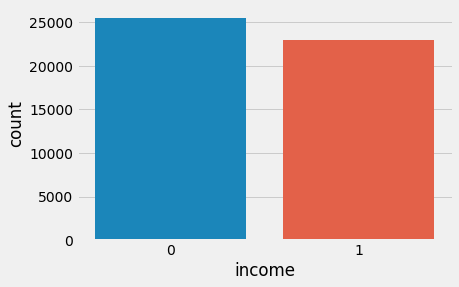

In [110]:
sns.countplot(y_ros)

In [111]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[5881 1808]
 [2493 4340]]
******************************
0.7038286737363999
******************************
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      7689
           1       0.71      0.64      0.67      6833

    accuracy                           0.70     14522
   macro avg       0.70      0.70      0.70     14522
weighted avg       0.70      0.70      0.70     14522

******************************
Wall time: 1.15 s


In [112]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[5067 2622]
 [1803 5030]]
******************************
0.695289904971767
******************************
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      7689
           1       0.66      0.74      0.69      6833

    accuracy                           0.70     14522
   macro avg       0.70      0.70      0.70     14522
weighted avg       0.70      0.70      0.70     14522

******************************
Wall time: 16 s


In [113]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6483 1206]
 [ 373 6460]]
******************************
0.8912684203277785
******************************
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7689
           1       0.84      0.95      0.89      6833

    accuracy                           0.89     14522
   macro avg       0.89      0.89      0.89     14522
weighted avg       0.90      0.89      0.89     14522

******************************
Wall time: 647 ms


In [114]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6736  953]
 [ 319 6514]]
******************************
0.9124087591240876
******************************
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7689
           1       0.87      0.95      0.91      6833

    accuracy                           0.91     14522
   macro avg       0.91      0.91      0.91     14522
weighted avg       0.92      0.91      0.91     14522

******************************
Wall time: 8.25 s


In [ ]:
error = []
for i in range(100,2000,100):
    print(i)
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    error.append(np.mean(preds != y_test))

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(100,2000,100),error,style="--",color = 'black',marker = "O",markersize=10,markerfacecolor='red')

In [115]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7588  101]
 [5502 1331]]
******************************
0.6141716017077538
******************************
              precision    recall  f1-score   support

           0       0.58      0.99      0.73      7689
           1       0.93      0.19      0.32      6833

    accuracy                           0.61     14522
   macro avg       0.75      0.59      0.53     14522
weighted avg       0.74      0.61      0.54     14522

******************************
Wall time: 3min 4s


### Only with Scaled Data .

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [117]:
# Scaling the train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7066  591]
 [1005 1591]]
******************************
0.8443382424656198
******************************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7657
           1       0.73      0.61      0.67      2596

    accuracy                           0.84     10253
   macro avg       0.80      0.77      0.78     10253
weighted avg       0.84      0.84      0.84     10253

******************************
Wall time: 582 ms


In [119]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6874  783]
 [1149 1447]]
******************************
0.8115673461425924
******************************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7657
           1       0.65      0.56      0.60      2596

    accuracy                           0.81     10253
   macro avg       0.75      0.73      0.74     10253
weighted avg       0.80      0.81      0.81     10253

******************************
Wall time: 10.4 s


In [120]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6610 1047]
 [ 944 1652]]
******************************
0.8058129328001561
******************************
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7657
           1       0.61      0.64      0.62      2596

    accuracy                           0.81     10253
   macro avg       0.74      0.75      0.75     10253
weighted avg       0.81      0.81      0.81     10253

******************************
Wall time: 413 ms


In [121]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7006  651]
 [ 967 1629]]
******************************
0.8421925290158978
******************************
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7657
           1       0.71      0.63      0.67      2596

    accuracy                           0.84     10253
   macro avg       0.80      0.77      0.78     10253
weighted avg       0.84      0.84      0.84     10253

******************************
Wall time: 4.77 s


In [122]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[7187  470]
 [1147 1449]]
******************************
0.8422900614454306
******************************
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7657
           1       0.76      0.56      0.64      2596

    accuracy                           0.84     10253
   macro avg       0.81      0.75      0.77     10253
weighted avg       0.84      0.84      0.83     10253

******************************
Wall time: 47.2 s


### Scaling after Resampling.

In [123]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros ,y_ros = ros.fit_resample(X,y)

In [124]:
# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=43)

In [125]:
# Scaling the train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6250 1439]
 [1186 5647]]
******************************
0.819239774135794
******************************
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7689
           1       0.80      0.83      0.81      6833

    accuracy                           0.82     14522
   macro avg       0.82      0.82      0.82     14522
weighted avg       0.82      0.82      0.82     14522

******************************
Wall time: 716 ms


In [127]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[5990 1699]
 [1047 5786]]
******************************
0.8109075884864344
******************************
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      7689
           1       0.77      0.85      0.81      6833

    accuracy                           0.81     14522
   macro avg       0.81      0.81      0.81     14522
weighted avg       0.81      0.81      0.81     14522

******************************
Wall time: 16.7 s


In [128]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6476 1213]
 [ 412 6421]]
******************************
0.8881008125602534
******************************
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7689
           1       0.84      0.94      0.89      6833

    accuracy                           0.89     14522
   macro avg       0.89      0.89      0.89     14522
weighted avg       0.89      0.89      0.89     14522

******************************
Wall time: 623 ms


In [129]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6702  987]
 [ 335 6498]]
******************************
0.9089657072028646
******************************
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7689
           1       0.87      0.95      0.91      6833

    accuracy                           0.91     14522
   macro avg       0.91      0.91      0.91     14522
weighted avg       0.91      0.91      0.91     14522

******************************
Wall time: 7.05 s


In [130]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")


[[6140 1549]
 [ 995 5838]]
******************************
0.8248175182481752
******************************
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7689
           1       0.79      0.85      0.82      6833

    accuracy                           0.82     14522
   macro avg       0.83      0.83      0.82     14522
weighted avg       0.83      0.82      0.82     14522

******************************
Wall time: 2min 23s


In [131]:
accu

[0.7812347605578855,
 0.7609480152150591,
 0.8023017653369745,
 0.837218375109724,
 0.780942163269287]

In [147]:
sca_scores = [lrmodel_sca_auc,knn_sca_auc,tree_sca_auc,rfc_sca_auc,svc_sca_auc]

In [133]:
ovr_scores = [lrmodel_ovr_auc,knn_ovr_auc,tree_ovr_auc,rfc_ovr_auc,svc_ovr_auc]

In [134]:
sca_ovr_scores = [lrmodel_ovr_sca_auc,knn_ovr_sca_auc,tree_ovr_sca_auc,rfc_ovr_sca_auc,svc_ovr_sca_auc]

In [152]:
models = ["Linear Regression","K Nearest Neighbours","Decision Tree classifier","Random Forest Classifier","Support Vector Classifier"]

In [161]:
scores_df = pd.DataFrame({"Model":models,"Noraml_Auc":accu,"Scaled_Auc":sca_scores,"OverSampled_Auc":ovr_scores,"OverSampled&Scaled_Auc":sca_ovr_scores})

In [166]:
scores_df.set_index(scores_df["Model"],inplace=True)
scores_df.drop("Model",axis=1,inplace=True)

### HyperParameters Optimization

#### Since Random Forests gave the Best Results,  let's optimize it.

In [168]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,6,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 6, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [170]:
random_rf = RandomForestClassifier()

In [171]:
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1)
rf_random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100)

In [172]:
rf_random_grid.best_params_

{'n_estimators': 2000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [173]:
rf_random_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=2000)

In [174]:
bestgrid = rf_random_grid.best_estimator_

In [175]:
predict = bestgrid.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.8514581098215157
[[7193  469]
 [1054 1537]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7662
           1       0.77      0.59      0.67      2591

    accuracy                           0.85     10253
   macro avg       0.82      0.77      0.79     10253
weighted avg       0.85      0.85      0.84     10253



### With Over Sampling.

In [176]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros ,y_ros = ros.fit_resample(X,y)

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=42)

In [178]:
random_rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1,verbose=2)
rf_random_grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [179]:
bestgrid = rf_random_grid.best_estimator_

In [180]:
predict = bestgrid.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.8982922462470734
[[6647 1014]
 [ 463 6398]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7661
           1       0.86      0.93      0.90      6861

    accuracy                           0.90     14522
   macro avg       0.90      0.90      0.90     14522
weighted avg       0.90      0.90      0.90     14522



In [189]:
### ovr = OverSampled Data
### sca = Normalized Data

In [188]:
scores_df.style.background_gradient(cmap="inferno")

,Noraml_Auc,Scaled_Auc,OverSampled_Auc,OverSampled&Scaled_Auc
Model,,,,
Linear Regression,0.781235,0.844338,0.703829,0.819240
K Nearest Neighbours,0.760948,0.811567,0.695290,0.810908
Decision Tree classifier,0.802302,0.805813,0.891268,0.888101
Random Forest Classifier,0.837218,0.842193,0.912409,0.908966
Support Vector Classifier,0.780942,0.842290,0.614172,0.824818
